# Задание по SQL

# Схема:

<a href="https://ibb.co/X8D6k1P"><img src="https://i.ibb.co/FVXcq21/image.png" alt="image" border="0"></a>

# Описание данных:

<b>Таблица books</b>

Содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

<b>Таблица authors</b>

Содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

<b>Таблица publishers</b>

Содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

<b>Таблица ratings</b>

Содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

<b>Таблица reviews</b>

Содержит данные о пользовательских обзорах на книги:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя пользователя, написавшего обзор;
- text — текст обзора.


# Цель исследования:

- загрузить таблицы, проанализировать их и ответить на вопросы "заказчика":
1. сколько книг вышло после 1 января 2000 года;
2. для каждой книги посчитайте количество обзоров и среднюю оценку;
3. определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
4. определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
5. посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Импорт библиотек. Подключение к базе.

In [1]:
# импорт библиотек

import pandas as pd
from sqlalchemy import text, create_engine

import matplotlib.pyplot as plt

In [2]:
# устанавливаем параметры

db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

In [3]:
# сохраняем коннектор

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# Исследуем таблицы.

In [4]:
query_eda_1 = '''SELECT * FROM books'''

query_eda_2 = '''SELECT * FROM authors'''

query_eda_3 = '''SELECT * FROM publishers'''

query_eda_4 = '''SELECT * FROM ratings '''

query_eda_5 = '''SELECT * FROM reviews'''

In [5]:
# первые пять строк таблицы books

books = pd.io.sql.read_sql(sql=text(query_eda_1), con = engine)

print(books.shape[0])
books.head(5)

1000


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


По условию, в таблице books содержатся данные о книгах. В таблице 1 000 строк, 6 столбцов:
- 4 столбца содержат числовые данные (int или smallint ?), 
- столбец title содержит символьные значение (varchar или text ?),
- столбец publication_date - данные в формате date.

In [6]:
# первые пять строк таблицы authors

author = pd.io.sql.read_sql(sql=text(query_eda_2), con = engine)

print(author.shape[0])
author.head(5)

636


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


В таблице author - 636 строк и 2 столбца - один из них содержит числовые значение, другой - символьные.

In [7]:
# первые пять строк таблицы books

publisher = pd.io.sql.read_sql(sql=text(query_eda_3), con = engine)

print(publisher.shape[0])
publisher.head(5)

340


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


В publisher - 340 строк, содержание схоже с таблицей author (один столбец - числовой, второй - строка).

In [8]:
# первые пять строк таблицы ratings

rating = pd.io.sql.read_sql(sql=text(query_eda_4), con = engine)

print(rating.shape[0])
rating.head(5)

6456


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


На данный момент, таблица rating - самая длинная из имеющихся.
Хранит в себе данные о пользовательских оценках книг - 6 456 строк и 4 стобца, три из которых - числые, один - текстовый.

In [9]:
# первые пять строк таблицы reviews

reviews = pd.io.sql.read_sql(sql=text(query_eda_5), con = engine)

print(reviews.shape[0])
reviews.head(5)

2793


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


reviews содержит данные о пользовательских обзорах на книги:
- всего - 2 793 строки,
- 4 столбца, из которых два числовых и два текстовых (типы которых - varchar и text).

# Задание № 1

<b>Посчитайте, сколько книг вышло после 1 января 2000 года.</b>

In [11]:
query_1 = '''
           SELECT COUNT(book_id)
           FROM books
           WHERE publication_date > '2000-01-01'
           '''

In [12]:
con=engine.connect()

pd.io.sql.read_sql(sql=text(query_1), con = con)

,count
0,819


В период с 1 января 2000 года по 31 марта 2020 года (максимальное значение даты из таблицы books) вышло 819 книг.

# Задание № 2

<b>Для каждой книги посчитайте количество обзоров и среднюю оценку.</b>

In [13]:
query_2 = '''
           WITH b_re AS
           (SELECT DISTINCT b.book_id, b.title, 
           COUNT(re.review_id) OVER (PARTITION BY b.book_id) AS review_count
           FROM books AS b
           LEFT JOIN reviews AS re ON b.book_id=re.book_id),
           
           ra AS
           (SELECT DISTINCT book_id, 
           ROUND(AVG(rating) OVER (PARTITION BY book_id), 2)  AS avg_rating
           FROM ratings)
           
           SELECT b_re.book_id, b_re.title, b_re.review_count,
           ra.avg_rating
           FROM b_re
           JOIN ra ON b_re.book_id = ra.book_id
           '''

In [14]:
con = engine.connect()

request_query_2 = pd.io.sql.read_sql(sql=text(query_2), con = con)
request_query_2

,book_id,title,review_count,avg_rating
0,1,'Salem's Lot,2,3.67
1,2,1 000 Places to See Before You Die,1,2.50
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3,4.67
3,4,1491: New Revelations of the Americas Before C...,2,4.50
4,5,1776,4,4.00
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.67
996,997,Xenocide (Ender's Saga #3),3,3.40
997,998,Year of Wonders,4,3.20
998,999,You Suck (A Love Story #2),2,4.50


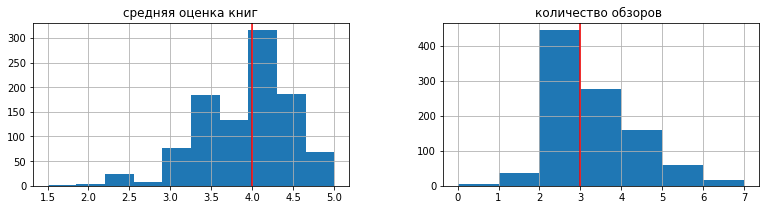

In [15]:
# визуализируем 

bins_rewiew = request_query_2['review_count'].max()

plt.figure(figsize=(13,3))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1 = plt.subplot(1, 2, 1)
plt.title('средняя оценка книг')
request_query_2['avg_rating'].hist()
plt.axvline(x=request_query_2['avg_rating'].median(), color='red')


ax2 = plt.subplot(1, 2, 2)
plt.title('количество обзоров ')
request_query_2['review_count'].hist(bins=bins_rewiew)
plt.axvline(x=request_query_2['review_count'].median(), color='red')

plt.show()

Медианное значение оценки книг - около 4, в датасете есть данные как о бесцеллерах, так и о посредственных книгах (оценки меньше двух).

Медианное значение количества обзоров - три обзора.


# Задание № 3

<b>Определите издательство, которое выпустило наибольшее число книг толще
50 страниц — так вы исключите из анализа брошюры.</b>

In [16]:
query_3 = '''
           SELECT DISTINCT p. publisher, 
           COUNT(b.book_id) OVER (PARTITION BY p.publisher)
           FROM books AS b
           LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
           WHERE b.num_pages > 50
           ORDER BY count DESC
           LIMIT 1
           '''

In [17]:
con = engine.connect()

pd.io.sql.read_sql(sql=text(query_3), con = con)

,publisher,count
0,Penguin Books,42


Издатель-рекордсмен, выпустивших больше всего книг (толщиной более 50 страниц - не брошюр) - это Penguin Books (42 полноценных издания).

# Задание № 4

<b>Определите автора с самой высокой средней оценкой книг — учитывайте
только книги с 50 и более оценками.</b>

In [18]:
query_4 = '''
          WITH ra AS
          (SELECT DISTINCT book_id, 
          COUNT(rating_id) OVER (PARTITION BY book_id) AS rating_count,
          ROUND(AVG(rating) OVER (PARTITION BY book_id), 2) AS rating_avg
          FROM ratings),
          
          b as
          (SELECT ra.*, b.author_id
          FROM ra
          JOIN books as b ON ra.book_id=b.book_id
          WHERE ra.rating_count >= 50)
          
          SELECT DISTINCT b.author_id, a.author, 
          ROUND(AVG(b.rating_avg) OVER (PARTITION BY a.author_id), 6) as author_avg
          FROM b
          JOIN authors AS a ON a.author_id = b.author_id 
          ORDER BY author_avg DESC
          LIMIT 1
          '''

In [19]:
con = engine.connect()

pd.io.sql.read_sql(sql=text(query_4), con = con)

,author_id,author,author_avg
0,236,J.K. Rowling/Mary GrandPré,4.285


Автор с самой высокой средней оценкой книг - Дж. Роулинг.

# Задание № 5

<b>Посчитайте среднее количество обзоров от пользователей, которые поставили
больше 48 оценок.</b>

In [20]:
query_5 = '''
           WITH t AS
           (SELECT DISTINCT username,
           COUNT(rating_id) OVER (PARTITION BY username)
           FROM ratings),
           
           re AS
           (SELECT DISTINCT t.username, t.count as rating_count,
           COUNT(r.review_id) OVER (PARTITION BY t.username) as review_count
           FROM t
           INNER JOIN reviews AS r ON r.username=t.username
           WHERE t.count > 48)
           
           SELECT AVG(re.review_count)
           FROM re
           
           '''

In [21]:
con = engine.connect()

pd.io.sql.read_sql(sql=text(query_5), con = con)

,avg
0,24.0


Агрегация необходимых данных была выполнена в несколько этапов:
- с начала мы посчитали сколько оценок ставил каждый пользователей и отобрали среди них тех, кто поставил более 48 оценок,
- полученный список пользователей мы соединили с таблицей reviews, посчитали сколько обзоров написали пользователи-рекордсмены по оценкам.

Среднее количество обзоров от этих пользователей гораздо меньше среднего количеста оценок, это логично - оценки ставить проще.

# Вывод по проделанной работе:

Для исследования нам было доступно пять таблиц с информацией о книгах, авторах, издательствах, пользовательских оценках и обзорах на эти книги - в датасетах хранится информация о 1 000 книгах и их 636 авторах. Данные книги выпускаются в 340 издательствах.

Мы провели исследовательскую работу и ответили на интересующие нас вопросы:
- в период с 1 января 2000 года по 31 марта 2020 года на рынок выпущено 819 книг;
- средняя пользовательская оценка на книги из датасета колеблется от 1.5 до 5, с медианным значением 4 балла;
- количество обзоров - от 0 до 7, медианное значение - 3 обзора;
- издательство-рекордсмен, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books, 42 полноценных издания;
- автор-рекодсмен с самой высокой средней оценкой книг - Дж. К. Роулинг;
- пользователи, которые выставили более 48 оценок, написали в среднем по 24 обзора.